# Traffic Classification 101

## 1. Model Building

In [1]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dropout, Input, BatchNormalization, Conv1D, MaxPooling1D, Dense, Flatten, GlobalMaxPooling1D


model = keras.Sequential()

## relu
model.add(Conv1D(kernel_size=5, filters=200, input_shape=(1, 1500), padding='same', strides=3, activation='relu'))
# model.add(Dropout(0.5))
model.add(Conv1D(kernel_size=4, filters=200, padding='same', strides=3, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))

## final multi classification

model.add(Dense(12, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 200)            1500200   
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 200)            160200    
                                                                 
 global_max_pooling1d (Globa  (None, 200)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                        

2022-05-18 14:46:40.614887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Data Preprossing

In [3]:
import datasets


dataset_dict = datasets.load_dataset("train_test_data/traffic_classification/train.parquet")
dataset = dataset_dict[list(dataset_dict.keys())[0]]
xtrain = np.array(dataset['feature'])
ytrain = np.array(dataset['label'])
# ytrain.shape  (12731,)

# x = x[..., None]
# y = y[..., None]
xtrain = np.expand_dims(xtrain, axis=-2)
# xtrain.shape (12731, 1, 1500)
# ytrain = np.expand_dims(ytrain, axis=-1)
# ytrain.shape (12731, 1)
from keras.utils import to_categorical
ytrain = to_categorical(ytrain, 12)


## validation data
test_dataset_dict = datasets.load_dataset("train_test_data/traffic_classification/test.parquet")
test_dataset = test_dataset_dict[list(test_dataset_dict.keys())[0]]
xtest = np.array(test_dataset['feature'])
ytest = np.array(test_dataset['label'])

xtest = np.expand_dims(xtest, axis=-2)

from keras.utils import to_categorical
ytest = to_categorical(ytest, 12)


Using custom data configuration train.parquet-40527459c65d4f4f
Reusing dataset parquet (/Users/tangmoumou/.cache/huggingface/datasets/parquet/train.parquet-40527459c65d4f4f/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121)


  0%|          | 0/1 [00:00<?, ?it/s]

## 3.  Model Training

In [12]:
# model.fit(dataset['feature'],dataset['label'], epochs=5, batch_size=128)
history = model.fit(xtrain, ytrain, epochs=20, batch_size=128, validation_data=(xtest, ytest))

Epoch 1/20
1095/1095 [==============================] - 130s 118ms/step - loss: 0.1341 - accuracy: 0.9406 - val_loss: 0.2640 - val_accuracy: 0.9109
Epoch 2/20
1095/1095 [==============================] - 114s 104ms/step - loss: 0.1348 - accuracy: 0.9402 - val_loss: 0.2862 - val_accuracy: 0.9069
Epoch 3/20
1095/1095 [==============================] - 95s 87ms/step - loss: 0.1356 - accuracy: 0.9395 - val_loss: 0.2255 - val_accuracy: 0.9212
Epoch 4/20
1095/1095 [==============================] - 91s 83ms/step - loss: 0.1303 - accuracy: 0.9430 - val_loss: 0.2476 - val_accuracy: 0.9152
Epoch 5/20
1095/1095 [==============================] - 93s 85ms/step - loss: 0.1242 - accuracy: 0.9445 - val_loss: 0.2260 - val_accuracy: 0.9263
Epoch 6/20
1095/1095 [==============================] - 99s 90ms/step - loss: 0.1227 - accuracy: 0.9460 - val_loss: 0.2681 - val_accuracy: 0.9131
Epoch 7/20
1095/1095 [==============================] - 100s 92ms/step - loss: 0.1328 - accuracy: 0.9404 - val_loss: 0.3

## 4. Model Evaluation

In [6]:
## report
test_dataset_dict = datasets.load_dataset("train_test_data/traffic_classification/test.parquet")
test_dataset = test_dataset_dict[list(test_dataset_dict.keys())[0]]
xtest = np.array(test_dataset['feature'])
ytest = np.array(test_dataset['label'])

xtest = np.expand_dims(xtest, axis=-2)

from keras.utils import to_categorical
ytest = to_categorical(ytest, 12)

# test_loss, test_acc = model.evaluate(xtest, ytest)

Resolving data files:   0%|          | 0/51 [00:00<?, ?it/s]

Using custom data configuration test.parquet-ebe28a10d62ba24e
Reusing dataset parquet (/Users/tangmoumou/.cache/huggingface/datasets/parquet/test.parquet-ebe28a10d62ba24e/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121)


  0%|          | 0/1 [00:00<?, ?it/s]

20236/20236 [==============================] - 64s 3ms/step - loss: 0.2815 - accuracy: 0.9121


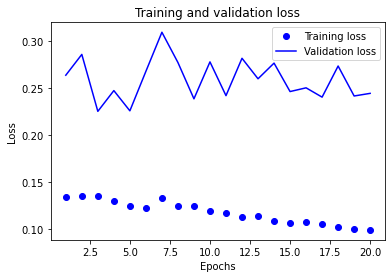

In [13]:
# loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

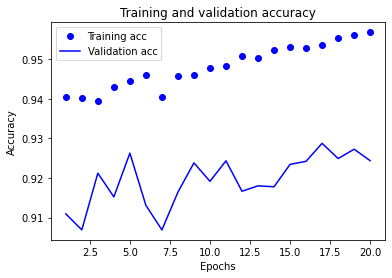

In [14]:
# accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
## save
model.save('0.1_traffic_classification.h5')

In [16]:
ytest.argmax(axis=1)

array([2, 2, 2, ..., 0, 1, 1])

## 5. Confusion Matrix

In [35]:
y_prediction = model.predict(xtest)
y_prediction = np.argmax(y_prediction, axis = 1)
y_test=np.argmax(ytest, axis=1)

20236/20236 [==============================] - 92s 5ms/step


In [32]:
import seaborn as sns
def plot_confusion_matrix(cm, labels):
#     normalised_cm = normalise_cm(cm)
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        data=cm, cmap='YlGnBu',
        xticklabels=labels, yticklabels=labels,
        annot=True, ax=ax, fmt='.2f'
    )
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    fig.show()

In [34]:
#Create confusion matrix and normalizes it over predicted (columns)
from sklearn.metrics import confusion_matrix

result = confusion_matrix(y_test, y_prediction , normalize='pred')
# print(result)

/var/folders/ph/0c0rbw0j66v6mpd7k8t25fxm0000gn/T/ipykernel_77165/3566660733.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


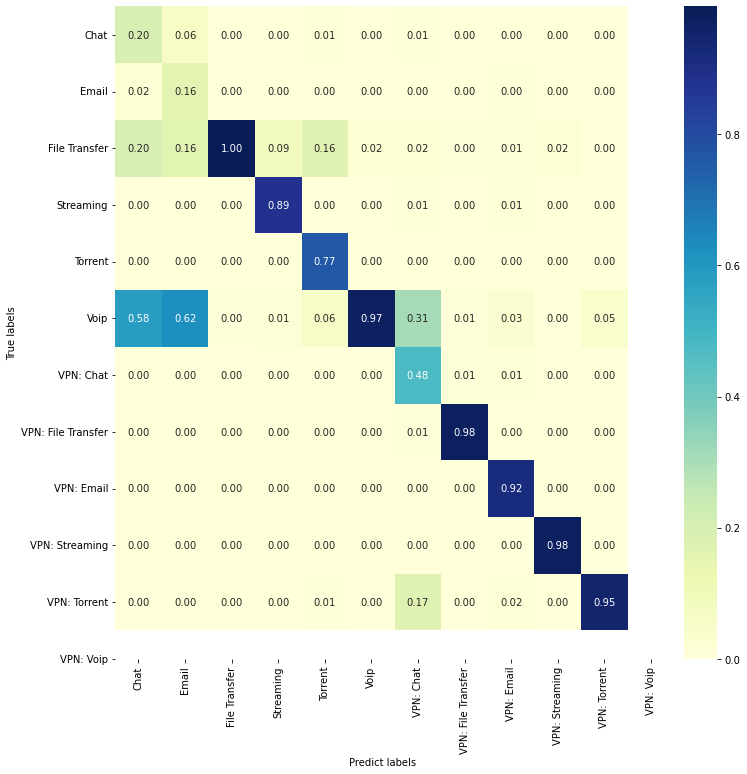

In [37]:
ID_TO_TRAFFIC = {
    0: 'Chat',
    1: 'Email',
    2: 'File Transfer',
    3: 'Streaming',
    4: 'Torrent',
    5: 'Voip',
    6: 'VPN: Chat',
    7: 'VPN: File Transfer',
    8: 'VPN: Email',
    9: 'VPN: Streaming',
    10: 'VPN: Torrent',
    11: 'VPN: Voip',
}
app_labels = []
for i in sorted(list(ID_TO_TRAFFIC.keys())):
    app_labels.append(ID_TO_TRAFFIC[i])
plot_confusion_matrix(result, app_labels)